In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, diff, solve, nsolve, solveset, latex, S, simplify, fraction, Union, Interval, intersection, limit
from sympy.calculus.util import continuous_domain
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
%matplotlib inline

## Занятие 8
## Математический анализ
## Дифференцирование функции, заданной параметрически
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
тогда производная $y$ по $x$  находится по формуле
$$
y'_x = \frac{y'_t}{x'_t} = \frac{\psi'_t}{\varphi'_t}
$$
Вторая производная:
$$
y''_{xx} = \frac{x'_t y''_{tt}-x''_{tt}y'_t}{(x'_t)^3}  = \frac{\varphi'_t \psi''_{tt}-\varphi''_{tt}\psi'_t}{(\varphi'_t)^3}
$$
### Задание 1
Найти производные 1 и 2 порядка функции 
$$
\left\{
\begin{matrix}
x = \sin(t) - t\cos(t)\\
y = \cos(t) + t\sin(t)
\end{matrix}
\right.
$$

In [2]:
t = Symbol('t')
x = Sin(t) - t*Cos(t)
y = Cos(t) + t*Sin(t)
dx = diff(x, t)
dy =  diff(y, t)
dy_x = dy/dx
dy2_xx = simplify((dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3)
display(dy_x, dy2_xx)

cos(t)/sin(t)

-1/(t*sin(t)**3)

### Задание 2.
Найти нули производных первого и второго порядка, а также точки, в которых эти производные не существуют, для функции
$$
\left\{
\begin{matrix}
x = t^2 - 2t\\
y = t^2 + 2t
\end{matrix}
\right.
$$

In [3]:
t = Symbol('t')
x = t*t - 2*t
y = t*t + 2*t
dx = diff(x, t)
dy =  diff(y, t)
dy_x = dy/dx
dy2_xx = simplify((dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3)
display(dy_x, dy2_xx)

(2*t + 2)/(2*t - 2)

-1/(t - 1)**3

In [4]:
dy_x_num, dy_x_den = fraction(dy_x)
dy_x_num_nul = solveset(dy_x_num)
dy_x_den_nul = solveset(dy_x_den)
display('Первая производная, нули числителя:', dy_x_num_nul, 'нули знаменателя:', dy_x_den_nul)
dy2_xx_num,dy2_xx_den = fraction(dy2_xx)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)
display('Вторая производная, нули числителя:', dy2_xx_num_nul, 'нули знаменателя:', dy2_xx_den_nul)

'Первая производная, нули числителя:'

{-1}

'нули знаменателя:'

{1}

'Вторая производная, нули числителя:'

EmptySet

'нули знаменателя:'

{1}

### Задание 3. 
Найти точки экстремума и точки перегиба функции Задания 2.

In [5]:
crit_points = Union(dy_x_num_nul, dy_x_den_nul)
crit_points = list(crit_points)
crit_points.sort()
crit_points_1 = [crit_points[0]-1] + crit_points + [crit_points[-1]+1]
crit_points_1.sort()
points = [(item + crit_points_1[i + 1])/2 for i, item in enumerate(crit_points_1[:-1])]
max_arr=[]
min_arr=[]
for i, item in enumerate(crit_points):
    if item in dy_x_num_nul:
        df_left = dy_x.subs(t, points[i])
        df_right = dy_x.subs(t, points[i + 1])
        x_left = float(x.subs(t, points[i]))
        x_right = float(x.subs(t, points[i + 1]))
        if df_left < 0 and df_right > 0 and x_left < x_right or df_left > 0 and df_right < 0 and x_left > x_right:
            min_arr.append(item)
        elif df_left < 0 and df_right > 0 and x_left > x_right or df_left > 0 and df_right < 0 and x_left < x_right:
            max_arr.append(item)    
display('максимум', max_arr, 'минимум', min_arr)

'максимум'

[]

'минимум'

[-1]

In [6]:
dy2_xx_points = list((dy2_xx_num_nul.union(dy2_xx_den_nul)))
dy2_xx_points.sort()
dy2_xx_points_1 = [dy2_xx_points[0]-1] + dy2_xx_points + [dy2_xx_points[-1]+1]
dy2_xx_points_1.sort()
points = [(item + dy2_xx_points_1[i + 1])/2 for i, item in enumerate(dy2_xx_points_1[:-1])]
inflection=[]
for i, item in enumerate(dy2_xx_points):
    if item in dy2_xx_num_nul:
        df_left = dy2_xx.subs(t, points[i])
        df_right = dy2_xx.subs(t, points[i + 1])
        if df_left*df_right < 0:
            inflection.append(item)      
display('перегиб ', inflection)

'перегиб '

[]

### Задание 4. Точки перегиба
Найти точки перегиба функции, график строить не нужно. 
$$
\left\{
\begin{matrix}
x = e^t\\
y = te^{2t}
\end{matrix}
\right.
$$

In [7]:
t = Symbol('t')
x = sympy.exp(t)
y = t*sympy.exp(t*2)
dx = diff(x, t)
dy =  diff(y, t)
dy2_xx = simplify((dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3)
dy2_xx_num,dy2_xx_den = fraction(dy2_xx)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)
dy2_xx_points = list((dy2_xx_num_nul.union(dy2_xx_den_nul)))
dy2_xx_points.sort()
dy2_xx_points_1 = [dy2_xx_points[0]-1] + dy2_xx_points + [dy2_xx_points[-1]+1]
dy2_xx_points_1.sort()
points = [(item + dy2_xx_points_1[i + 1])/2 for i, item in enumerate(dy2_xx_points_1[:-1])]
inflection=[]
for i, item in enumerate(dy2_xx_points):
    if item in dy2_xx_num_nul:
        df_left = dy2_xx.subs(t, points[i])
        df_right = dy2_xx.subs(t, points[i + 1])
        if df_left*df_right < 0:
            inflection.append(item)      
display('перегиб ', inflection)

'перегиб '

[-3/2]

## Асимптоты параметрически заданной функции
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
Сначала нужно определить, нет ли таких значений параметра $t$, при которых одна из функций $\varphi(t)$ или $\psi(t)$ обращается в бесконечность, а другая остается конечной. При $\varphi(t_0) = \infty$, а $\psi(t_0) = c$ кривая имеет горизонтальную асимптоту  $y = c$. При  $\psi(t_0) = \infty$, а $\varphi(t_0) = c$ кривая имеет вертикальную асимптоту $x = c$. 

Если $\varphi(t_0) = \psi(t_0) = \infty$ и 
$$
\lim_{t\to t_0} \frac{\psi(t)}{\varphi(t)} = k;\qquad \lim_{t\to t_0} [\psi(t) - k\varphi(t)] = b,
$$
то   кривая имеет наклонную асимптоту  $y = kx + b$. 

### Индивидуальное задание.
Найти асимптоты параметрически заданной функции и изобразить на графике функцию и ее асимптоты.
$$
\left\{
\begin{matrix}
x = 5e^t + 5e^{−t} \\
y = 5e^t − 5e^{−t}
\end{matrix}
\right.
$$

Заметим, что $x \to \infty$ и $y \to \infty$ при $t \to \infty$, так что вычислим на положительной бесконечности пределы 
$$
\lim_{t\to \infty} \frac{y}{x};\qquad \lim_{t\to \infty} [y - kx].
$$. 

In [8]:
t = Symbol('t')
x = 5*sympy.exp(t) + 5*sympy.exp(-t)
y = 5*sympy.exp(t) - 5*sympy.exp(-t)
display(limit(y/x, t, +sympy.oo))


1

Получили $k = 1 < \infty$, вычисляем второй предел:

In [9]:
display(limit(y - x, t, +sympy.oo))

0

Следовательно, $y = x$ - наклонная асимптота.

Заметим, что $x \to \infty$ и $y \to - \infty$ при $t \to - \infty$, так что вычислим на отрицательной бесконечности пределы 
$$
\lim_{t\to \infty} \frac{y}{x};\qquad \lim_{t\to \infty} [y - kx].
$$. 

In [10]:
display(limit(y/x, t, -sympy.oo))


-1

Получили $k = -1 < \infty$, вычисляем второй предел:

In [11]:
display(limit(y + x, t, -sympy.oo))

0

Следовательно, $y = - x$ - наклонная асимптота.

(-100.0, 100.0)

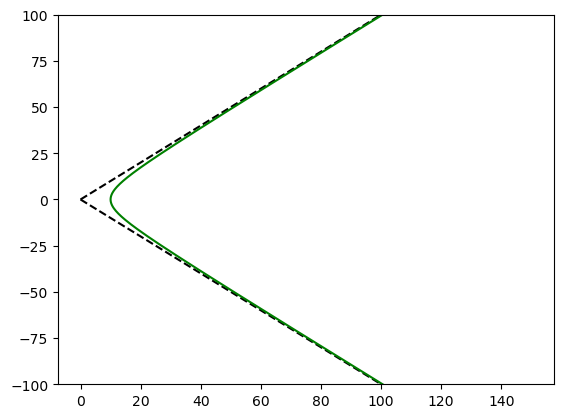

In [12]:
T = np.linspace(-3, 3, 200)
plt.plot((0, 150), (0, 150), color='black', linestyle='--')    
plt.plot((0, 150), (0, -150), color='black', linestyle='--')    
plt.plot(5*np.exp(T) + 5*np.exp(-T), 5*np.exp(T) - 5*np.exp(-T), color='green')
plt.ylim(-100, 100)